## **HW4 Principal Component Analysis**

# 1. Introduction
Congratulations on reaching the final assignment! In this assignment, you will learn how to use Principal Components Analysis (PCA) to reduce the dimensionality of high-dimensional data. Additionally, you will compare various differences between the original high-dimensional data and the transformed data obtained through PCA.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
! pip install import_ipynb

You should consider upgrading via the '/Users/evanpai/.pyenv/versions/3.10.2/bin/python3.10 -m pip install --upgrade pip' command.


In [2]:
'''
You are not allowed to import other packages

If you cannot import the following ipynb file, Please run the ipynb file first and then restart the HW4.ipynb.
'''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
import math
from tqdm import tqdm
import time

import import_ipynb
from PCA import MY_PCA,  MY_SparsePCA
from Model import *
from Loss import *
from Utils import *
from Data_preprocess import *
from Trainer import *
from Config import *

importing Jupyter notebook from PCA.ipynb
importing Jupyter notebook from Data_preprocess.ipynb
importing Jupyter notebook from Model.ipynb
importing Jupyter notebook from Loss.ipynb
importing Jupyter notebook from Utils.ipynb
importing Jupyter notebook from Trainer.ipynb
importing Jupyter notebook from Config.ipynb


## Model & Data preprocess

As mentioned in Assignment 3, this assignment is closely related to it. Please follow the data preprocessing and model implementation steps from Assignment 3. Note that there are additional constraints on the layer stacking in the model implementation this time. Be sure to follow the prompts for designing the model accordingly.

This time, we'll organize different functionalities into separate files for better code readability. For the model and data preprocessing, please implement them in the following files: Loss.ipynb, Model.ipynb, and Data_preprocess.ipynb.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


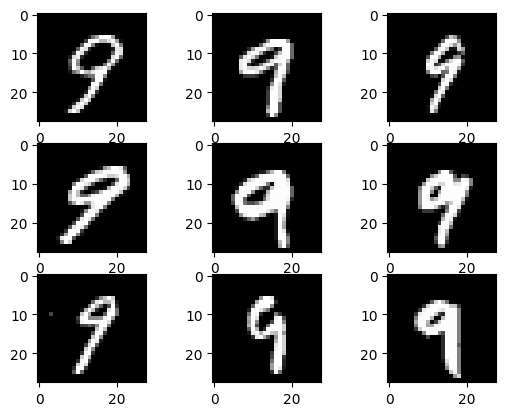

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


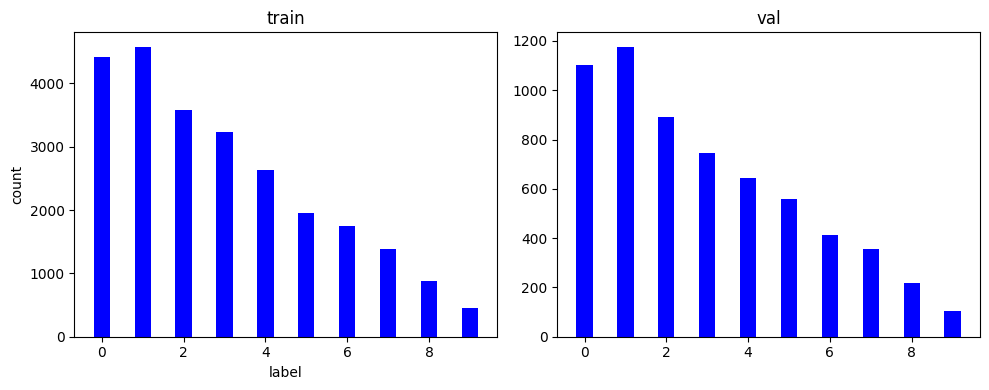

In [3]:
X_train, Y_train, X_test = load_data('basic_data.npz')
x_train, y_train, x_val, y_val = data_preprocess(X_train, Y_train)

# 2. Basic Part

## PCA Implement
In this section, you are required to implement PCA by completing the following steps in the PCA.ipynb file.
>* Step1. Centering --> in HW4.ipynb
>* Step2. Covariance matrix computation --> in PCA.ipynb
>* Step3. Eigenvectors and eigenvalues computation --> in PCA.ipynb
>* Step4. Projection --> in PCA.ipynb

After implementing PCA, you need to reduce the data to two dimensions, observe the two-dimensional scatter plot of the data, and include it in the report.

In [4]:
# GRADED CODE: Implement centering function. (5%)
### START CODE HERE ###
'''
PCA Step1
HINT: It is important to choose the appropriate mean for data centralization..

x_train_cent -> Centeralized training data
x_val_cent -> Centeralized validation data
x_test_cent -> Centeralized testing data
'''

mean_train = np.mean(x_train, axis=0)
x_train_cent = x_train - mean_train

mean_val = np.mean(x_val, axis=0)
x_val_cent = x_val - mean_val

mean_test = np.mean(X_test, axis=0)
X_test_cent = X_test - mean_test
### END CODE HERE ###

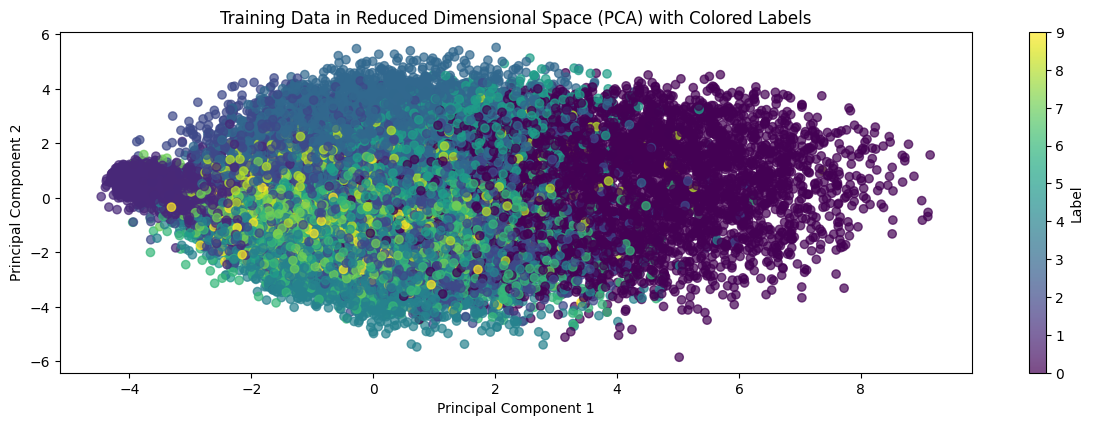

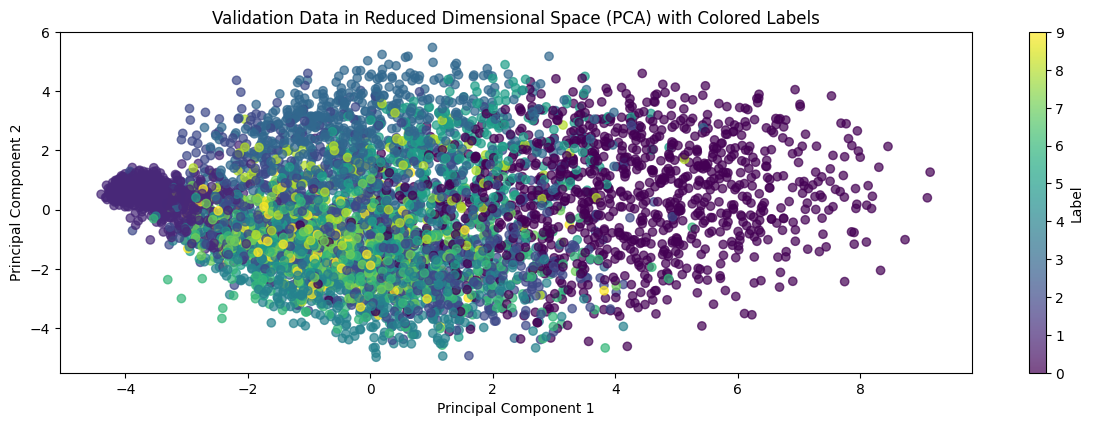

In [5]:
# GRADED CODE:
# Reduce the dimensions to two and generate scatter plots.
# (Training dataset  5%, Validation dataset 5%)

### START CODE HERE ###
'''
x_train_pca -> PCA of training data
x_val_pca -> PCA of validation data
x_test_pca -> PCA of testing data
Please use pca.function(data) to generate PCA of these datasets

Parameters:
MY_PCA:
n_components = Number of components to do the transformation.

pca.PCA_visualization:
data_pca -> The dataset you want to visuallize.
label -> The coresponding labels of the data_pca
text -> True if you want to plot the number on the scater plot.
tag -> You can set different tag for different figure
'''
pca = MY_PCA(n_components=2)

x_train_pca = pca.fit_transform(x_train)
x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)

# pca.PCA_visualization(x_train_pca, x_train, n_components=2, tag="Training")
# pca.PCA_visualization(x_val_pca, x_val, n_components=2, tag="Validation")

pca.PCA_visualization(data_pca=x_train_pca, label=y_train, text=False, n_components=2, tag='Training')
pca.PCA_visualization(data_pca=x_val_pca, label=y_val, text=False, n_components=2, tag='Validation')

# x_train_pca = None
# x_val_pca = None
# x_test_pca = None

# pca.PCA_visualization(data_pca=None, label=None, text=None, n_components=2, tag=None)
### END CODE HERE ###

The example PCA visuallization of IRIS Datasets.

![figure](./iris_pca.png "IRIS PCA dataset")

In [6]:
# For grading, Please put the basic_cov into your output.npy.
basic_cov = pca.covariance_matrix
print('covariance_matrix: ', (basic_cov[100][12:16]*10000).round(3))
#The reason for multiplying by 10,000 here is that the original values are too small and difficult to observe
print(f'x_train_pca:', x_train_pca[0].round(3))
print('x_val_pca: ',x_val_pca[0].round(3))

covariance_matrix:  [0.015 0.322 0.322 0.013]
x_train_pca: [0.707 3.321]
x_val_pca:  [-2.295 -2.88 ]


**Expected Output**
$$ covariance\_matrix:\  [0.015\ \  0.322\ \ 0.322\ \ 0.013]$$
$$ x\_train\_pca:\ [0.707\ \ 3.321]$$
$$ x\_val\_pca:\ [-2.295\  -2.88]$$
$$or$$
$$ x\_train\_pca:\ [-0.707\ \ -3.321]$$
$$ x\_val\_pca:\ [2.295\  2.88]$$

In [7]:
# GRADED CODE: TRAINING MODEL WITH PCA DATA (PCA for Training, Validation and Test Dataset)
### START CODE HERE ###
'''
n_components -> Number fo components of PCA, and it will be the input dimension of your basic model.
pca -> Define your MY_PCA class here.

x_train_pca -> PCA of training data
x_val_pca -> PCA of validation data
x_test_pca -> PCA of testing data
Please use pca.xxx(data) to generate PCA of these datasets
'''


n_components = 60

pca = MY_PCA(n_components=n_components)

x_train_pca = pca.fit_transform(x_train)

x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)
### END CODE HERE ###



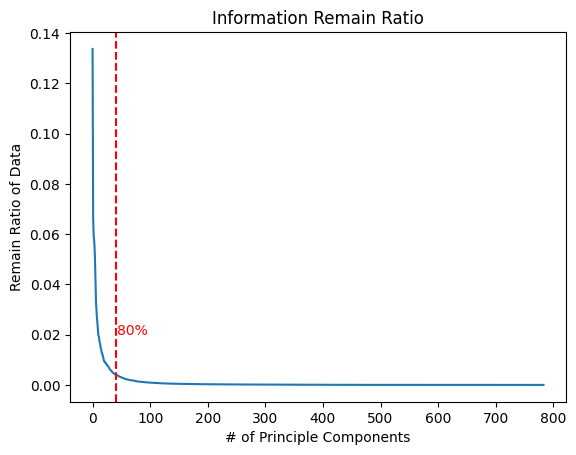

In [8]:
# GRADED CODE: PCA INFORMATION REMAIN RATIO PLOT
# Calculate the minimum number of principal components to cover 80% variance (5%)
### START CODE HERE ###
'''
num_PC -> Minimum number of principal components to cover 80% variance
var_ratio -> The variance ratio of each component
'''

num_PC, var_ratio = pca.components_remain_ratio(0.80)
#var_ratio = np.cumsum(var_ratio)
### END CODE HERE###


plt.plot(var_ratio)
plt.axvline(x=num_PC, color='r', linestyle='--')

plt.text(x=num_PC+3, y=0.02, s='80%', color='r')
plt.title('Information Remain Ratio')
plt.xlabel('# of Principle Components')
plt.ylabel('Remain Ratio of Data')
plt.savefig('Infotmation Remaining Ratio.png')
plt.show()
plt.close()

## Reconstruct  Data & Eigenvectors Visuallization

In [9]:


# GRADED CODE:
# Reconstruct image by using K components and compare with the original image (Training data 5%, Validation data 5%)
# Visuallize at least one eigenvector
# For grading, please put the reconstruct_data_train and the reconstruct_data_val in output.npy
reconstruct_data_train, z_train = pca.reconstructData(x_train[0], np.mean(x_train, axis=0), k=4)
reconstruct_data_val, z_val = pca.reconstructData(x_val[0], np.mean(x_train, axis=0), k=4)

### START CODE HERE ###
'''
reconstruct_img -> The reconstruct image of x_train[0].
eigenvector_img -> The image of eigenvector
'''

original_image_shape = (28, 28)

reconstruct_img = reconstruct_data_train.reshape(original_image_shape)
eigenvector_img = pca.eigen_vec[:, 0].reshape(original_image_shape)

plt.imshow(eigenvector_img, cmap='binary')
plt.savefig('eigenvector_img.png')
plt.close()
### END CODE HERE ###

plt.imshow(reconstruct_img, cmap='binary')

### Please put the reconstruct img in your report
plt.savefig('reconstruct_img.png')
plt.close()

train_squared_reconstruct_error = np.sum(x_train[0] - reconstruct_data_train)**2/reconstruct_data_train.shape[0]
val_squared_reconstruct_error = np.sum(x_val[0] - reconstruct_data_val)**2/reconstruct_data_val.shape[0]

In [10]:
print('k principle components:', num_PC)
print('Train Squared Reconstruct Error: ', train_squared_reconstruct_error.round(3))
print('Validation Squared Reconstruct Error: ',val_squared_reconstruct_error.round(3))
print('z: ', ['%.3f' %(z) for z in z_train])

k principle components: 40
Train Squared Reconstruct Error:  0.043
Validation Squared Reconstruct Error:  0.077
z:  ['0.707', '3.321', '0.928', '0.603']


**Expected output:**

$$ k\ principle\ components:  40 $$
$$ Train\ Squared\ Recontstruct\ Error:  0.043 $$
$$ Validation\ Squared\ Reconstruct\ Error:  0.077 $$
$$ z:  [0.707, 3.321, 0.928, 0.603] $$
$$or$$
$$ z:  [-0.707, -3.321, 0.928, -0.603] $$

### Model
In this part, you need to train your model with low-dimensional data (after PCA) and original data, respectively. Compare the difference between them.

Loss after iteration 0: 15.438854


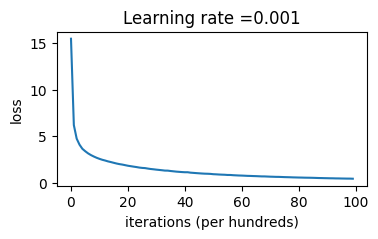

In [11]:
config = Config([x_train.shape[1], 128, 10], 'focal_loss')

#CODE: TRAINING MODEL WITHOUT PCA DATA (MODEL SETTING AND TRAINING)

# Call Model.ipynb with config to define 'model'
# Use Trainer.ipynb to train your model.
### START CODE HERE ###
# X_train, Y_train, X_test = load_data('basic_data.npz')
# x_train, y_train, x_val, y_val = data_preprocess(X_train, Y_train)

model = Model(config)
trainer(model,
        config, 
        x_train, 
        y_train)
### END CODE HERE ###

In [12]:
pred_train = predict(x_train, y_train, model)

Accuracy: 96.97%
f1 score for each class: [0.96075206 0.98260773 0.96963706 0.97271318 0.98528302 0.95972325
 0.96774194 0.97268908 0.92388451 0.95493562]
f1_macro score: 0.96


In [13]:
pred_val = predict(x_val, y_val, model)

Accuracy: 94.22%
f1 score for each class: [0.94881517 0.97622136 0.9471891  0.94410774 0.95598456 0.90846287
 0.93473193 0.92080537 0.87265136 0.81981982]
f1_macro score: 0.92


Loss after iteration 0: 16.160836


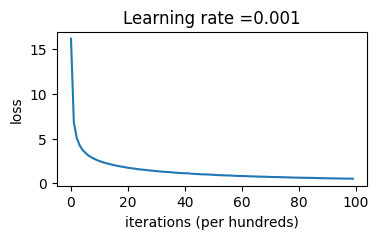

In [14]:
config = Config([n_components, 128, 10], 'focal_loss')

# GRADED CODE: TRAINING MODEL WITH PCA DATA (MODEL SETTING AND TRAINING)
# Use PCA and the model from HW3 (advanced part) to train models on the imbalance MNIST dataset. (10%)

# Call Model.ipynb with config to define 'model'
# Use Trainer.ipynb to train your model.
### START CODE HERE ###
x_train_pca = pca.fit_transform(x_train)

x_val_pca = pca.transform(x_val)
x_test_pca = pca.transform(X_test)

model = Model(config)

trainer(model, config, x_train_pca, y_train)
### END CODE HERE ###

In [15]:
pred_train = predict(x_train_pca, y_train, model)

Accuracy: 96.64%
f1 score for each class: [0.95571041 0.98316722 0.96716923 0.97360248 0.98111069 0.94936087
 0.95880564 0.96984572 0.92025184 0.95176849]
f1_macro score: 0.96


In [16]:
pred_val = predict(x_val_pca, y_val, model)

Accuracy: 94.45%
f1 score for each class: [0.94061303 0.98189655 0.94356659 0.94933333 0.96233666 0.92321117
 0.93518519 0.92828146 0.8697479  0.81818182]
f1_macro score: 0.93


In [17]:
pred_test = predict(x_test_pca, None, model)
outputs = {}

### for grading
outputs["basic_pred_test"] = pred_test
outputs["basic_layers_dims"] = config.layers_dims
outputs["basic_activation_fn"] = config.activation_fn
outputs["basic_loss_function"] = config.loss_function
outputs["basic_alpha"] = config.alpha
outputs["basic_gamma"] = config.gamma
outputs["basic_reconstruct_data_train"] = reconstruct_data_train
outputs["basic_reconstruct_data_val"] = reconstruct_data_val
outputs["basic_covariance_matrix"] = basic_cov
outputs["basic_var_ratio"] = var_ratio
basic_model_parameters = []
for basic_linear in model.linear:
    basic_model_parameters.append(basic_linear.parameters)
outputs["basic_model_parameters"] = basic_model_parameters

# 3. Advanced Part

In the advanced section, you will learn how to implement non-linear PCA, Sparse PCA.
Please complete the PCA.ipynb file for this purpose.

Train: X=(31065, 28, 28), Y=(31065,)
Test: X=(7767, 28, 28)


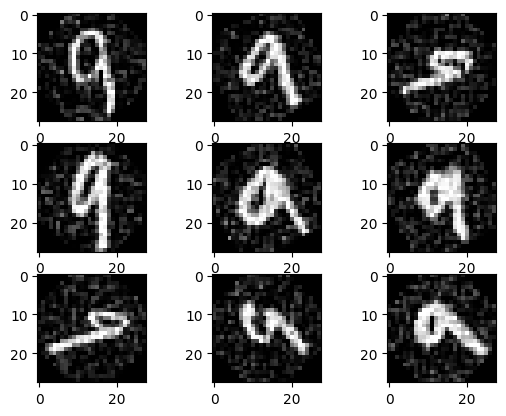

shape of X_train: (31065, 28, 28)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 28, 28)

shape of X_train: (31065, 784)
shape of Y_train: (31065, 10)
shape of X_test: (7767, 784)
shape of x_train: (24852, 784)
shape of y_train: (24852, 10)
training data - percentage [0.18, 0.18, 0.14, 0.13, 0.11, 0.08, 0.07, 0.06, 0.04, 0.02]
shape of x_val: (6213, 784)
shape of y_val: (6213, 10)
validation data - percentage [0.18, 0.19, 0.14, 0.12, 0.1, 0.09, 0.07, 0.06, 0.04, 0.02]


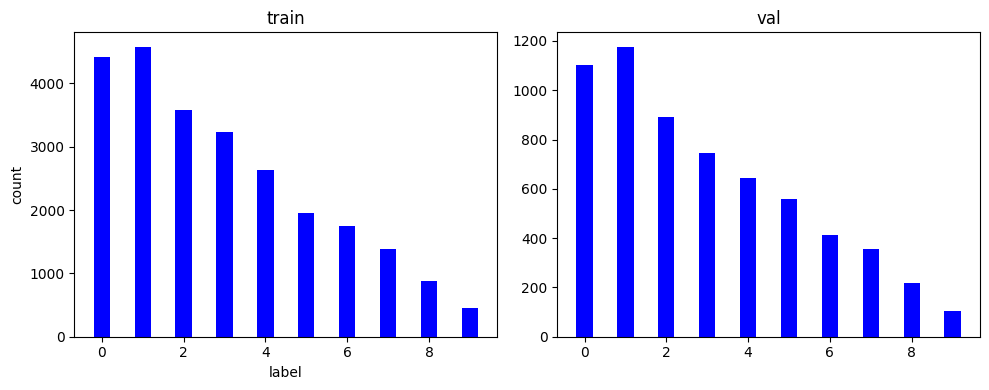

In [18]:
X_noise_train, Y_noise_train, X_noise_test = load_data('advanced_data.npz')
x_noise_train, y_noise_train, x_noise_val, y_noise_val = data_preprocess(X_noise_train, Y_noise_train)

In [19]:
# GRADED CODE: DATA CENTRALIZATION
### START CODE HERE ###
'''
x_noise_train_cent -> Centeralized training data
x_noise_val_cent -> Centeralized validation data
x_noise_test_cent -> Centeralized testing data
'''

mean_noise_train = np.mean(x_noise_train, axis=0)
x_noise_train_cent = x_noise_train - mean_noise_train

mean_noise_val = np.mean(x_noise_val, axis=0)
x_noise_val_cent = x_noise_val - mean_noise_val

mean_noise_test = np.mean(X_noise_test, axis=0)
X_noise_test_cent = X_noise_test - mean_noise_test
### END CODE HERE ###

In [ ]:
# YOU CAN DO PCA HERE TO COMPARE THE PERFORMANCE WITH SPARCEPCA (NOT FOR GRADING)
# PCA PART
### START CODE HERE ###
#PCA PART
None

#TRAIN WITH ORIGINAL DATA
None

#TRAIN WITH PCA DATA
None

### END CODE HERE ###

### SparsePCA

In [20]:
n_components = 2
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)


# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
'''
x_train_spca -> Sparse PCA of training data
x_val_spca -> Sparse PCA of validation data
x_test_spca -> Sparse PCA of testing data
'''
x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)


### END CODE HERE ###

100%|██████████| 1000/1000 [01:51<00:00,  8.97it/s]


In [21]:
### For grading please put sparse_pca_check and sparse_Vt in output.npy
sparse_pca_check = x_train_spca
sparse_Vt = sparse_pca.Vt[0][0]

print('Sparse_pca init Vt: ', sparse_Vt)
print('x_train_spca: ', sparse_pca_check[0].round(3))

Sparse_pca init Vt:  1.741604278811963e-20
x_train_spca:  [-0.229 -0.762]


**Expected Output**
$$ Sparse\_pca\ init\ Vt:\ 1.74160428e^{-20} $$
$$ x\_train\_spca:\ [-0.229\ \ -0.762]$$

## Sparse PCA imple

In [22]:
# GRADED CODE: SPARSE PCA IMPLEMENT
### START CODE HERE ###
'''
n_components -> Number of components fo Sparse PCA, and it will be the input dimension of your basic model.
sparse_pca -> Please use
x_train_spca -> Sparse PCA of training data
x_val_spca -> Sparse PCA of validation data
x_test_spca -> Sparse PCA of testing data
'''
n_components = 500
sparse_pca = MY_SparsePCA(n_components, 0.001, 1000)
x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)
### END CODE HERE ###

100%|██████████| 1000/1000 [06:40<00:00,  2.50it/s]


## Model

Loss after iteration 0: 28.439095


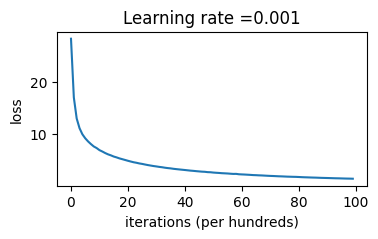

In [23]:
config = Config([n_components, 64, 10], 'focal_loss')

# GRADED CODE: SPARSE PCA IMPLEMENT
# Please call Model.ipynb and Trainer.ipynb to define and train your model.
### START CODE HERE ###
model = Model(config)

trainer(model, config, x_train_spca, y_noise_train)
### END CODE HERE ###

In [24]:
sparse_pred_train = predict(x_train_spca, y_noise_train, model)

Accuracy: 91.68%
f1 score for each class: [0.88284203 0.9651228  0.90638544 0.92471459 0.94205888 0.88531469
 0.91631356 0.91694352 0.85742188 0.90080972]
f1_macro score: 0.91


In [25]:
sparse_pred_val = predict(x_val_spca, y_noise_val, model)

Accuracy: 87.08%
f1 score for each class: [0.88132198 0.95534151 0.87398844 0.87723955 0.87187263 0.8141136
 0.85932388 0.83879423 0.72654691 0.63414634]
f1_macro score: 0.83


In [26]:
sparse_pred_test = predict(x_test_spca, None, model)

### Advanced Ranking
In the advanced ranking section, you are allowed to integrate PCA with additional data preprocessing. However, please note that you are not permitted to use existing data preprocessing and PCA libraries, modify the model's architecture, or alter the predetermined configuration.

In [27]:
# GRADED CODE: RANKING PART DO YOUR DATA PREPROCESS HERE (10%)
## input_dim comment ex. number of  principle components or image dim
## loss function = 'focal loss' or 'crossentropy'
### START CODE HERE ###
'''
input_dim -> The first input dimension of your model
eg. It could be the number of principle comopnents or original data dimension. Its depends on your data preprocess

loss_function -> You can choose the loss function from HW3. (eg. 'focal_loss')
'''
input_dim = 500
loss_function = 'focal_loss'

sparse_pca = MY_SparsePCA(input_dim, 0.001, 1000)
x_train_spca = sparse_pca.fit_transform(x_noise_train_cent)
x_val_spca = sparse_pca.transform(x_noise_val_cent)
x_test_spca = sparse_pca.transform(X_noise_test_cent)



### END CODE HERE ###

100%|██████████| 1000/1000 [06:39<00:00,  2.50it/s]


Loss after iteration 0: 27.256497


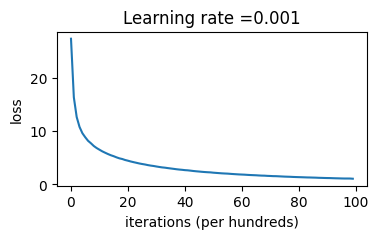

Accuracy: 92.97%
f1 score for each class: [0.89255372 0.97279215 0.91584229 0.93737498 0.95783582 0.90136214
 0.92393617 0.92673135 0.90097486 0.94692144]
f1_macro score: 0.93
Accuracy: 87.62%
f1 score for each class: [0.888667   0.96205844 0.87161773 0.87335092 0.88204358 0.82935154
 0.84760845 0.83745124 0.73662551 0.7       ]
f1_macro score: 0.84


In [28]:
adv_config = Config([input_dim, 128, 10], loss_function)
adv_model = Model(adv_config)

# GRADED CODE: RANKING PART DO YOUR TRAINING WORK HERE
# Please call Trainer.ipynb to train the adv_model.
### START CODE HERE ###
trainer(adv_model, adv_config, x_train_spca, y_noise_train)

sparse_pred_train = predict(x_train_spca, y_noise_train, adv_model)
sparse_pred_val = predict(x_val_spca, y_noise_val, adv_model)

adv_pred_test = predict(x_test_spca, None, adv_model)
### END CODE HERE ###

In [29]:
# for grading
outputs["sparse_Vt"] = sparse_Vt
outputs["sparse_pca"] = sparse_pca_check
outputs["sparse_pred_train"] = sparse_pred_train
outputs["sparse_pred_val"] = sparse_pred_val
outputs["sparse_pred_test"] = sparse_pred_test

outputs["advanced_pred_test"] = adv_pred_test
outputs["advanced_layers_dims"] = adv_config.layers_dims
outputs["advanced_activation_fn"] = adv_config.activation_fn
outputs["advanced_loss_function"] = adv_config.loss_function
outputs["advanced_alpha"] = adv_config.alpha
outputs["advanced_gamma"] = adv_config.gamma


advanced_model_parameters = []
for advanced_linear in adv_model.linear:
    advanced_model_parameters.append(advanced_linear.parameters)
outputs["advanced_model_parameters"] = advanced_model_parameters

In [30]:
# sanity check
assert list(outputs.keys()) == [
    'basic_pred_test',\
    'basic_layers_dims',\
    'basic_activation_fn',\
    'basic_loss_function',\
    'basic_alpha',\
    'basic_gamma',\
    'basic_reconstruct_data_train',\
    'basic_reconstruct_data_val',\
    'basic_covariance_matrix',\
    'basic_var_ratio',\
    'basic_model_parameters',\
    'sparse_Vt',\
    'sparse_pca',\
    'sparse_pred_train',\
    'sparse_pred_val',\
    'sparse_pred_test',\
    'advanced_pred_test',\
    'advanced_layers_dims',\
    'advanced_activation_fn',\
    'advanced_loss_function',\
    'advanced_alpha',\
    'advanced_gamma',\
    'advanced_model_parameters'],\
"You're missing something, please restart the kernel and run the code from begining to the end. If the same error occurs, maybe you deleted some outputs, check the template to find the missing parts!"

In [31]:
np.save("output.npy", outputs)

In [32]:
# sanity check
submit = np.load("output.npy", allow_pickle=True).item()
for key, value in submit.items():
    print(str(key) + "： " + str(type(value)))

basic_pred_test： <class 'numpy.ndarray'>
basic_layers_dims： <class 'list'>
basic_activation_fn： <class 'list'>
basic_loss_function： <class 'str'>
basic_alpha： <class 'numpy.ndarray'>
basic_gamma： <class 'float'>
basic_reconstruct_data_train： <class 'numpy.ndarray'>
basic_reconstruct_data_val： <class 'numpy.ndarray'>
basic_covariance_matrix： <class 'numpy.ndarray'>
basic_var_ratio： <class 'numpy.ndarray'>
basic_model_parameters： <class 'list'>
sparse_Vt： <class 'numpy.float64'>
sparse_pca： <class 'numpy.ndarray'>
sparse_pred_train： <class 'numpy.ndarray'>
sparse_pred_val： <class 'numpy.ndarray'>
sparse_pred_test： <class 'numpy.ndarray'>
advanced_pred_test： <class 'numpy.ndarray'>
advanced_layers_dims： <class 'list'>
advanced_activation_fn： <class 'list'>
advanced_loss_function： <class 'str'>
advanced_alpha： <class 'numpy.ndarray'>
advanced_gamma： <class 'float'>
advanced_model_parameters： <class 'list'>
